# Red Wine Quality Prediction Project_2024_final

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                              
from scipy.stats import zscore         # importing libraries

In [2]:
winedf=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/winequality-red.csv')
winedf

#importing required dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
winedf.shape

(1599, 12)

dataset contains 1599 rows and 12 columns of data in which 11 columns are independent variables and 1 is dependent variables as per problem statement quality is output variable

In [4]:
winedf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

as per observation dataset contains 2 type of datatypes('float and int')

In [5]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


there is no null values

In [6]:
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values are present 

In [7]:
# checking differnt columns in dataset

winedf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# checking for duplicate values

winedf.duplicated().sum()

240

In [9]:
winedf[winedf.duplicated()].head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


In [10]:
winedf.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


dataset contains duplicate values so will remove the duplicates.

we can see here in sample also 1st row and 5th rows are same

In [11]:
winedf.drop_duplicates(inplace=True)
winedf.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


duplicate data has been removed as you see above we droped 5th row.

In [12]:
winedf.duplicated().sum()

0

there is no duplicate data present in our dataset

In [13]:
winedf.shape

(1359, 12)

after removing the duplicates new dataset contains 1359 rows and 12 columns

In [14]:
winedf.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [15]:
winedf['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [16]:
winedf['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

as per observations quality(output) column contains 6 unique values in which 5,6 and 7 are appearing most and 3,4 8 are least appearing.

<Axes: xlabel='quality', ylabel='count'>

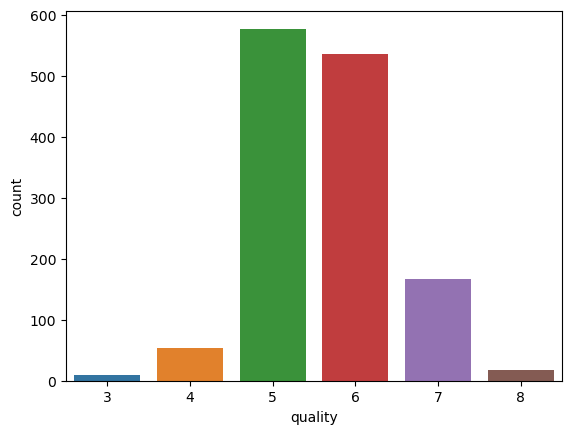

In [17]:
sns.barplot(x=winedf['quality'].value_counts().index,y=winedf['quality'].value_counts())

In [18]:
Quality=[]
for i in winedf['quality']:
    if i>=7:
        Quality.append(1)
    else:
        Quality.append(0)

In [19]:
winedf['Quality']=np.array(Quality)

as per the problem statement we need to categorize the winequality into good(1) or bad(0). so that we are dividing the quality of wine into 2 categories. if the quality of the wine is 7 or above we considering as Good quality below 7 considered as Bad wine. passing the numeric values 1 and 0 instead of Good and Bad so that machine will understand. 1 is for 'Good' and 0 is for 'Bad.... created new column Quality

In [20]:
winedf['Quality'].value_counts()

Quality
0    1175
1     184
Name: count, dtype: int64

In [21]:
winedf.sample(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
371,7.9,0.240,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6,0
507,11.2,0.670,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,6,0
421,6.6,0.840,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3,7,1
384,7.7,0.510,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,5,0
998,8.9,0.840,0.34,1.4,0.050,4.0,10.0,0.99554,3.12,0.48,9.1,6,0
1058,9.9,0.530,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6,7,1
1352,7.6,0.645,0.03,1.9,0.086,14.0,57.0,0.99690,3.37,0.46,10.3,5,0
595,8.9,0.595,0.41,7.9,0.086,30.0,109.0,0.99980,3.27,0.57,9.3,5,0


In [22]:
print(1175/184)

6.385869565217392


dataset contains more Bad quality wine than Good quality.ratio is also more (6.3 : 1). need to handle this...

In [23]:
print(len(winedf[winedf['quality']>=7]))
print(len(winedf[winedf['quality']<7]))

print(winedf['Quality'].value_counts())

184
1175
Quality
0    1175
1     184
Name: count, dtype: int64


crosschecking the values with new column count

In [24]:
# droping the quality column because we have already created new Quality column(good ,bad).

winedf.drop('quality',inplace=True,axis=1)

In [25]:
winedf.sample(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
100,8.3,0.61,0.30,2.1,0.084,11.0,50.0,0.99720,3.40,0.61,10.2,0
1120,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,1
112,8.4,0.60,0.10,2.2,0.085,14.0,111.0,0.99640,3.15,0.66,9.8,0
550,6.8,0.51,0.01,2.1,0.074,9.0,25.0,0.99580,3.33,0.56,9.5,0
609,6.3,0.36,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7,0
408,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,0
734,7.7,0.56,0.20,2.0,0.075,9.0,39.0,0.99870,3.48,0.62,9.3,0
670,6.9,0.40,0.24,2.5,0.083,30.0,45.0,0.99590,3.26,0.58,10.0,0


In [26]:
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


counts of all columns are same (1359).

mean is greater than median in all the columns .

in fixed acidity , total sulfur di oxide and residual sugar columns slightly right(+)skewness is present .

there may be chances of outliers present in total sulfur dioxide and free sulfur dioxide.(large difference b/w 75th percentile and max value. also

standard deviation of free sulfur dioxide and total sulfur dioxide is very high (spread of the data is high).

# Data visualization

Identifying Outliers

fixed acidity              Axes(0.125,0.53;0.110714x0.35)
volatile acidity        Axes(0.257857,0.53;0.110714x0.35)
citric acid             Axes(0.390714,0.53;0.110714x0.35)
residual sugar          Axes(0.523571,0.53;0.110714x0.35)
chlorides               Axes(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       Axes(0.125,0.11;0.110714x0.35)
density                 Axes(0.257857,0.11;0.110714x0.35)
pH                      Axes(0.390714,0.11;0.110714x0.35)
sulphates               Axes(0.523571,0.11;0.110714x0.35)
alcohol                 Axes(0.656429,0.11;0.110714x0.35)
Quality                 Axes(0.789286,0.11;0.110714x0.35)
dtype: object

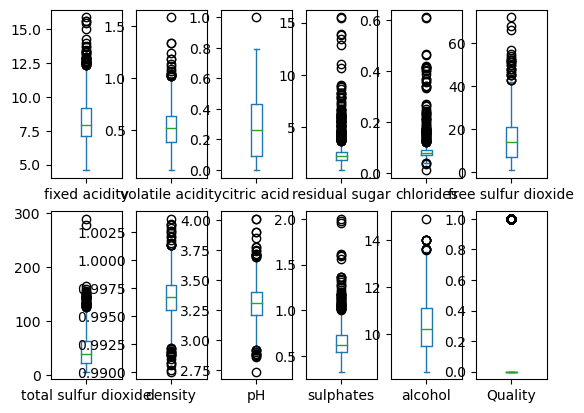

In [28]:
winedf.plot(kind='box',subplots=True,layout=(2,6))

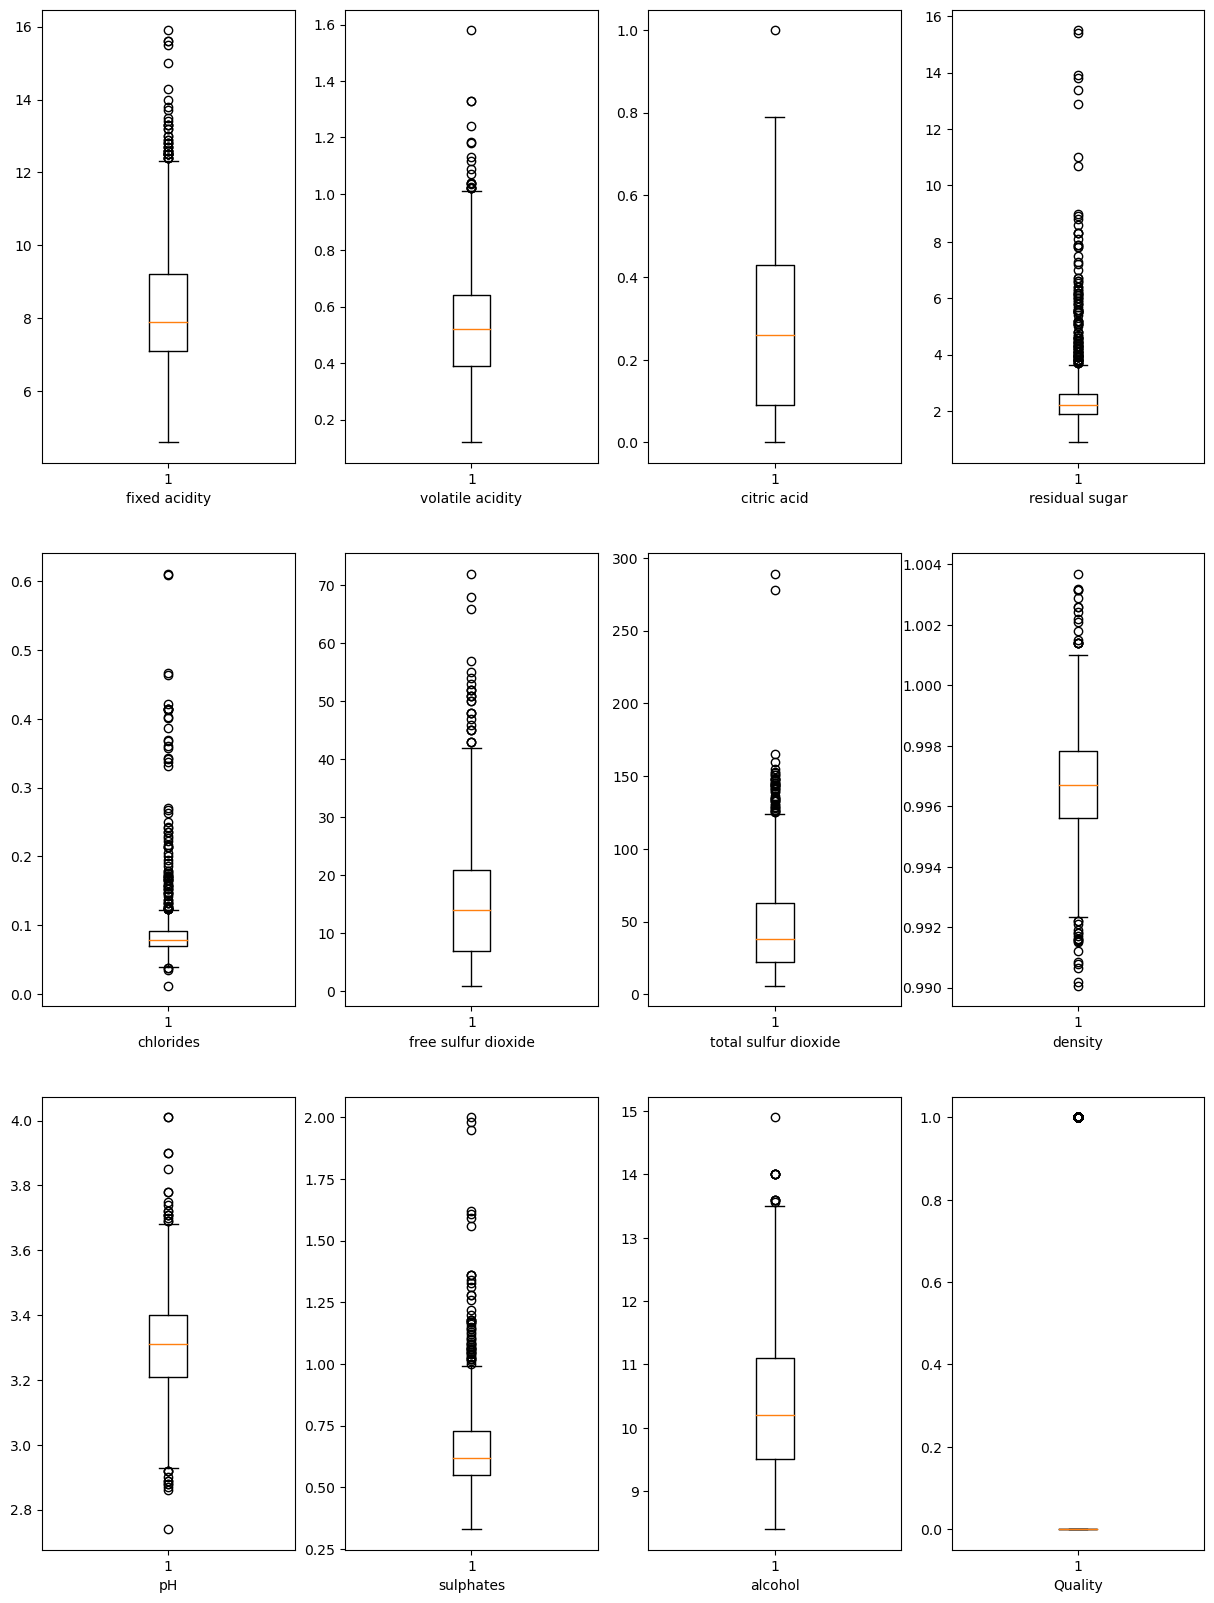

In [29]:
plt.figure(figsize=(15,20))
a=1
for i in winedf:
    if a<=13:
        plt.subplot(3,4,a)
        plt.boxplot(winedf[i])
        plt.xlabel(i)
    a=a+1
plt.show()

from the above graph we can identify outliers present different columns so we need to remove those outliers.

more outliers present in chlorides,sulphates,residual sugar,chlorides,fixed acidity,ph,free sulfur dioxide,volatileacidity,density and total sulfur dioxide.

In [30]:
from scipy.stats import zscore

In [31]:
# calculating z score for all data

z=np.abs(zscore(winedf))

In [32]:
print(np.where(z>3))

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
         41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
         99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
        150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
        252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
        363,  385,  385,  393,  408,  420,  420,  433,  448,  473,  483,
        483,  485,  485,  492,  506,  510,  513,  516,  528,  534,  555,
        562,  562,  564,  565,  565,  565,  582,  582,  592,  597,  599,
        602,  626,  627,  632,  652,  671,  672,  687,  710,  722,  764,
        764,  781,  786,  791,  792,  838,  866,  888,  895,  895,  912,
        918,  918,  920,  920,  945,  948,  963,  985,  994, 1003, 1013,
       1049, 1052, 1060, 1060, 1060, 1073, 1081, 1081, 1082, 1082, 1103,
       1106, 1107, 1117, 1121, 1123, 1123, 1125, 1151, 1159, 1162, 1165,
       1216, 1216, 1216, 1250, 1250, 1250, 1325, 1

In [33]:
winedf=winedf[(z<3).all(axis=1)]  # only considering the data which is below 3 z-score

In [34]:
winedf.shape

(1239, 12)

In [35]:
winedf.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
fixed acidity,1.000000,-0.295214,0.694900,0.178596,0.161180,-0.129192,-0.090289,0.659316,-0.708471,0.206067,-0.021713,0.121493
volatile acidity,-0.295214,1.000000,-0.586277,0.042038,0.079047,-0.000112,0.107727,0.009798,0.263937,-0.341434,-0.216562,-0.265619
citric acid,0.694900,-0.586277,1.000000,0.167597,0.099672,-0.058634,0.015058,0.359234,-0.527456,0.314609,0.161903,0.212201
residual sugar,0.178596,0.042038,0.167597,1.000000,0.098867,-0.010233,0.070850,0.329232,-0.076026,0.044924,0.161289,0.102291
chlorides,0.161180,0.079047,0.099672,0.098867,1.000000,-0.049311,0.059787,0.303134,-0.181430,0.044450,-0.211516,-0.117042
free sulfur dioxide,-0.129192,-0.000112,-0.058634,-0.010233,-0.049311,1.000000,0.654391,-0.027018,0.083310,0.051044,-0.090889,-0.088966
total sulfur dioxide,-0.090289,0.107727,0.015058,0.070850,0.059787,0.654391,1.000000,0.122758,-0.031596,-0.042984,-0.278700,-0.172122
density,0.659316,0.009798,0.359234,0.329232,0.303134,-0.027018,0.122758,1.000000,-0.321350,0.119810,-0.484351,-0.166476
pH,-0.708471,0.263937,-0.527456,-0.076026,-0.181430,0.083310,-0.031596,-0.321350,1.000000,-0.054193,0.140959,-0.076873
sulphates,0.206067,-0.341434,0.314609,0.044924,0.044450,0.051044,-0.042984,0.119810,-0.054193,1.000000,0.248136,0.310189


<Axes: >

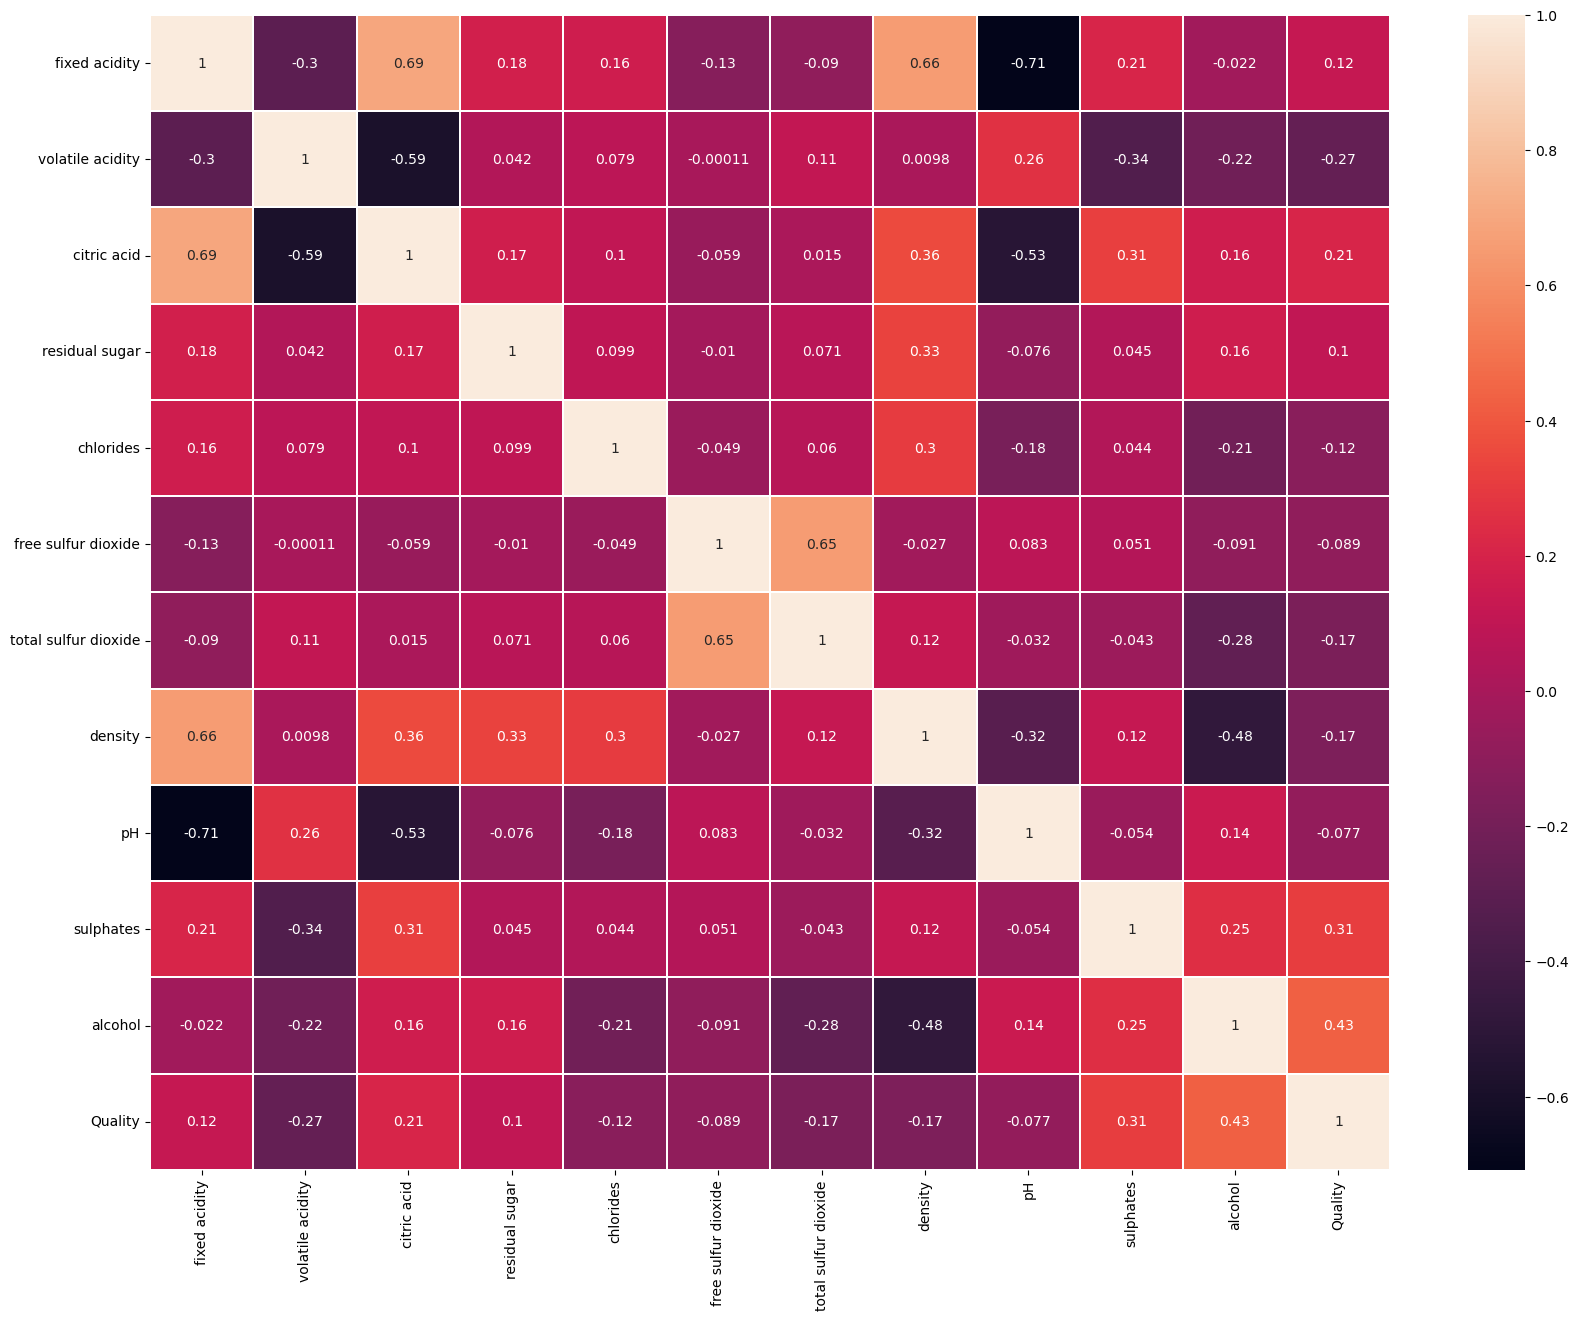

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(winedf.corr(),annot=True,linewidth=0.1)

Quality is moderately correlated with alcohol and sulphates.and low correlated with other variable.

free sulfur dioxide and total sulfur dioxide highly correlated with each other so that we are dropping any one columns

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
sns.scatterplot?

<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

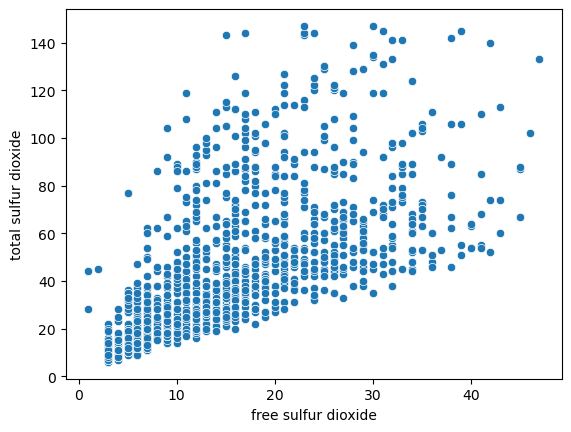

In [39]:
sns.scatterplot(x='free sulfur dioxide',y='total sulfur dioxide',data=winedf)

total sulfur dioxide and free sulfur dioxide are highly correlated with each other so dropping free sulfur dioxide to remove colanarity

In [40]:
# free sulfur dioxide is less correlated with Quality than total free dioxide so removing free sulfur dioxide

In [41]:
winedf=winedf.drop('free sulfur dioxide',axis=1)

In [42]:
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,0


now dataset contains 10 input variable and 1 output variable

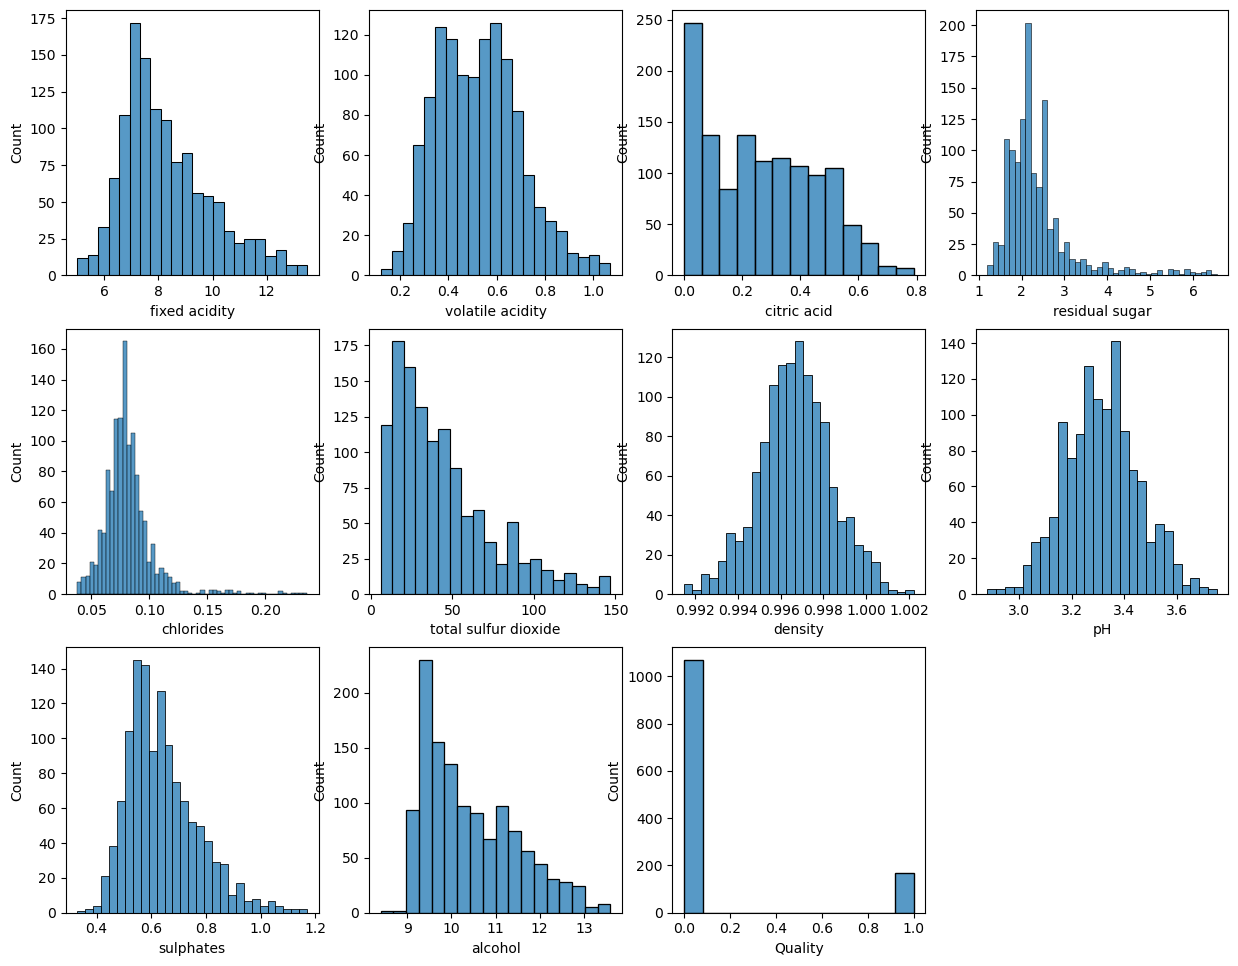

In [44]:
plt.figure(figsize=(15,20))
a=1
for i in winedf:
    if a<=13:
        plt.subplot(5,4,a)
        sns.histplot(winedf[i])
        plt.xlabel(i)
    a=a+1
plt.show()

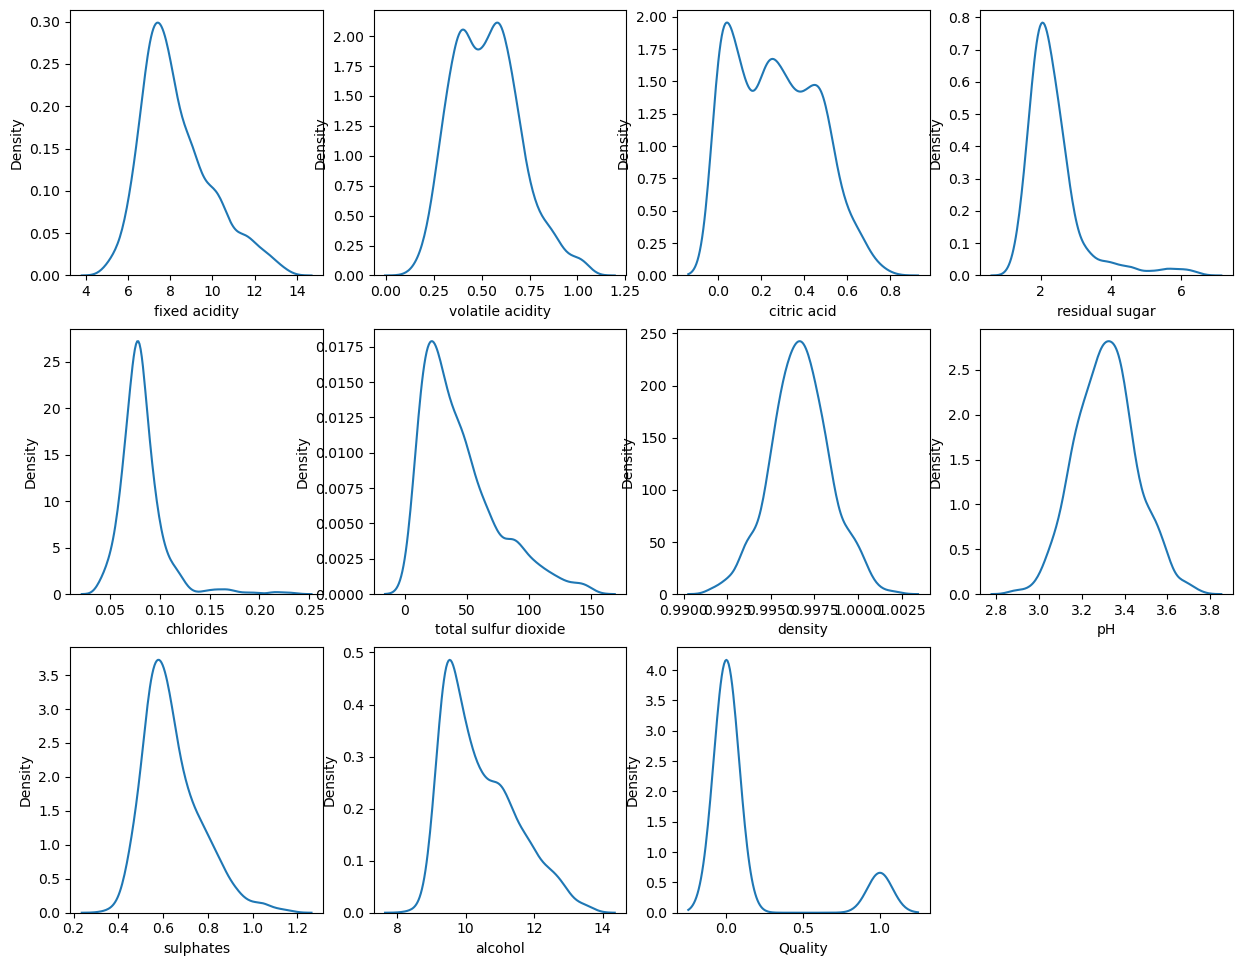

In [45]:
plt.figure(figsize=(15,20))
a=1
for i in winedf:
    if a<=13:
        plt.subplot(5,4,a)
        sns.kdeplot(winedf[i])
        plt.xlabel(i)
    a=a+1
plt.show()

In [46]:
winedf.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          2.371572
chlorides               2.480193
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
Quality                 2.121367
dtype: float64

as per graph and values skewness is present in the data.

high rightskewness are present in fixed acidity,chlorides,residual sugar,total sulfur dioxide,sulphates and alcohol.

In [47]:
list1=['fixed acidity','residual sugar','chlorides','total sulfur dioxide','sulphates','alcohol']


for i in list1:
    winedf[i]=np.log(winedf[i])

In [48]:
winedf.skew()

fixed acidity           0.353072
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.132089
chlorides               0.636774
total sulfur dioxide   -0.097387
density                 0.018132
pH                      0.116731
sulphates               0.388272
alcohol                 0.598996
Quality                 2.121367
dtype: float64

 have used boxcox,log,log10,exp,reciprocal,sqrt,cbrt methods but log gave me good result .so using log method

if i use different method 2nd time to remove the skewness getting Nan values in (chloride) column due to its low values.

In [49]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,2.001480,0.70,0.00,0.641854,-2.577022,3.526361,0.9978,3.51,-0.579818,2.240710,0
1,2.054124,0.88,0.00,0.955511,-2.322788,4.204693,0.9968,3.20,-0.385662,2.282382,0
2,2.054124,0.76,0.04,0.832909,-2.385967,3.988984,0.9970,3.26,-0.430783,2.282382,0
3,2.415914,0.28,0.56,0.641854,-2.590267,4.094345,0.9980,3.16,-0.544727,2.282382,0
5,2.001480,0.66,0.00,0.587787,-2.590267,3.688879,0.9978,3.51,-0.579818,2.240710,0


In [50]:
x=winedf.iloc[:,0:-1]
y=winedf.iloc[:,-1]               # dividing the data into x and y variables

In [51]:
x.shape

(1239, 10)

In [52]:
y.shape

(1239,)

In [53]:
# need to standardize the data before training where it is considering  mean will become 0 and std 1

In [54]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

need to standardize only x data not output data

In [55]:
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.506721,1.009464,-1.392862,-0.629716,-0.176355,-0.053482,0.650860,1.394315,-0.608389,-1.017264
1,-0.231342,2.050338,-1.392862,0.472036,0.874662,0.929264,0.068312,-0.806846,0.396750,-0.586577
2,-0.231342,1.356422,-1.183521,0.041384,0.613477,0.616752,0.184821,-0.380815,0.163163,-0.586577
3,1.661184,-1.419242,1.537914,-0.629716,-0.231112,0.769395,0.767369,-1.090867,-0.426722,-0.586577
4,-0.506721,0.778159,-1.392862,-0.819632,-0.231112,0.181970,0.650860,1.394315,-0.608389,-1.017264
...,...,...,...,...,...,...,...,...,...,...
1234,-0.949041,0.546853,-0.974180,-0.629716,-0.636168,0.107658,-0.100627,0.755268,1.365938,-0.907898
1235,-1.432247,0.431201,-0.974180,-0.449543,0.522615,0.320053,-1.038529,0.968284,-0.426722,0.126465
1236,-1.691689,0.142069,-0.869509,-0.114757,-1.018044,0.533943,-0.910368,1.465320,0.972562,0.793471
1237,-1.691689,0.691419,-0.764839,-0.449543,-0.231112,0.320053,-0.706477,1.820346,0.620251,-0.173121


In [56]:
winedf['Quality'].value_counts()

Quality
0    1070
1     169
Name: count, dtype: int64

<Axes: xlabel='Quality', ylabel='count'>

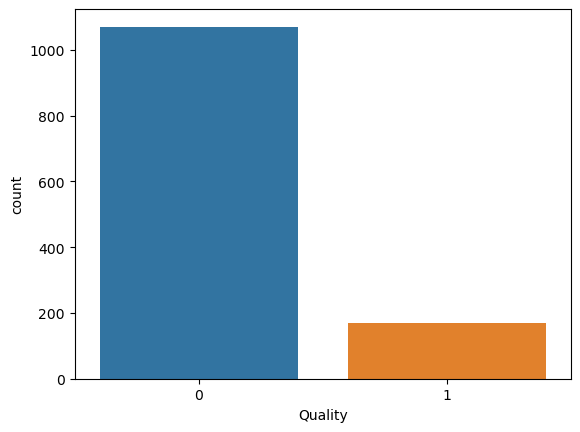

In [57]:
sns.barplot(x=winedf['Quality'].value_counts().index,y=winedf['Quality'].value_counts())

Quality data is not balanced ,so we need to balance the sample first before the training

In [58]:
!pip install imblearn

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smt=SMOTE()

In [61]:
x1,y1=smt.fit_resample(x,y)

In [62]:
y1.value_counts()

Quality
0    1070
1    1070
Name: count, dtype: int64

In [63]:
y.value_counts()

Quality
0    1070
1     169
Name: count, dtype: int64

we have balanced the output variable

# Model Building-

Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [67]:
x_train.shape

(1498, 10)

In [68]:
y_train.shape

(1498,)

In [69]:
x_test.shape

(642, 10)

In [70]:
y_test.shape

(642,)

In [71]:
lr.fit(x_train,y_train)

LogisticRegression()

In [72]:
pred=lr.predict(x_test)
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [73]:
ac=accuracy_score(y_test,pred)*100
ac

80.21806853582555

In [74]:
print(confusion_matrix(y_test,pred))

[[253  75]
 [ 52 262]]


In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       328
           1       0.78      0.83      0.80       314

    accuracy                           0.80       642
   macro avg       0.80      0.80      0.80       642
weighted avg       0.80      0.80      0.80       642



In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
val_score=cross_val_score(lr,x1,y1)
print(val_score)
print(val_score.mean())
val=(accuracy_score(y_test,pred)-val_score.mean())*100    # Evaluating model performance
val

[0.89485981 0.77570093 0.82476636 0.69859813 0.82009346]
0.8028037383177571


-0.06230529595016021

# Naive-Bayes Classifier

In [78]:
from sklearn.naive_bayes import GaussianNB

output contains only 2 categories so using gaussianNB

In [79]:
gab=GaussianNB()

In [80]:
gab.fit(x_train,y_train)

GaussianNB()

In [81]:
pred1=gab.predict(x_test)

In [82]:
ac1=accuracy_score(y_test,pred1)*100
print(ac1)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

78.50467289719626
[[249  79]
 [ 59 255]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       328
           1       0.76      0.81      0.79       314

    accuracy                           0.79       642
   macro avg       0.79      0.79      0.79       642
weighted avg       0.79      0.79      0.78       642



In [83]:
val_score1=cross_val_score(gab,x1,y1)
print(val_score1)
print(val_score1.mean())
val1=(accuracy_score(y_test,pred1)-val_score1.mean())*100   # Evaluating model performance
val1

[0.86448598 0.72429907 0.82943925 0.71495327 0.81308411]
0.789252336448598


-0.42056074766354534

# DecisionTree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtc=DecisionTreeClassifier()

In [86]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
pred2=dtc.predict(x_test)

In [88]:
ac2=accuracy_score(y_test,pred2)*100
ac2

85.202492211838

In [89]:
print(confusion_matrix(y_test,pred2))

[[268  60]
 [ 35 279]]


In [90]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       328
           1       0.82      0.89      0.85       314

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



In [91]:
val_score2=cross_val_score(dtc,x1,y1)
print(val_score2.mean())                    # Evaluating model performance

0.8514018691588785


In [92]:
val2=(accuracy_score(y_test,pred2)-val_score2.mean())*100
val2

0.06230529595016021

# Extra Tree Classifier

In [93]:
from sklearn.tree import ExtraTreeClassifier

In [94]:
etc=ExtraTreeClassifier()

In [95]:
etc.fit(x_train,y_train)

ExtraTreeClassifier()

In [96]:
pred3=etc.predict(x_test)

In [97]:
ac3=accuracy_score(y_test,pred3)*100
ac3

86.7601246105919

In [98]:
print(confusion_matrix(y_test,pred3))

[[265  63]
 [ 22 292]]


In [99]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       328
           1       0.82      0.93      0.87       314

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642



In [100]:
val_score3=cross_val_score(etc,x1,y1)
print(val_score3.mean())                  # Evaluating model performance

0.838785046728972


In [101]:
val3=(accuracy_score(y_test,pred3)-val_score3.mean())*100
val3

2.8816199376947016

# KNeighbors Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn=KNeighborsClassifier()

In [104]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [105]:
pred4=knn.predict(x_test)

In [106]:
ac4=accuracy_score(y_test,pred4)*100
ac4

87.38317757009347

In [107]:
print(confusion_matrix(y_test,pred4))

[[250  78]
 [  3 311]]


In [108]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       328
           1       0.80      0.99      0.88       314

    accuracy                           0.87       642
   macro avg       0.89      0.88      0.87       642
weighted avg       0.90      0.87      0.87       642



In [109]:
val_score4=cross_val_score(knn,x1,y1)                           # Evaluating model performance
print(val_score4.mean())

0.8453271028037384


In [110]:
val4=(accuracy_score(y_test,pred4)-val_score4.mean())*100
val4

2.850467289719627

# Support Vector Classifier

In [111]:
from sklearn.svm import SVC

In [112]:
sv=SVC()

In [113]:
sv.fit(x_train,y_train)

SVC()

In [114]:
pred5=sv.predict(x_test)

In [115]:
ac5=accuracy_score(y_test,pred5)*100
ac5

87.07165109034268

In [116]:
print(confusion_matrix(y_test,pred5))

[[277  51]
 [ 32 282]]


In [117]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       328
           1       0.85      0.90      0.87       314

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642



In [118]:
val_score5=cross_val_score(sv,x1,y1)
print(val_score5.mean())                           # Evaluating model performance

0.8537383177570094


In [119]:
val5=(accuracy_score(y_test,pred5)-val_score5.mean())*100
val5

1.6978193146417464

# Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rfc=RandomForestClassifier()

In [122]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [123]:
pred6=rfc.predict(x_test)

In [124]:
ac6=accuracy_score(y_test,pred6)*100
ac6

93.30218068535827

In [125]:
print(confusion_matrix(y_test,pred6))

[[290  38]
 [  5 309]]


In [126]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       328
           1       0.89      0.98      0.93       314

    accuracy                           0.93       642
   macro avg       0.94      0.93      0.93       642
weighted avg       0.94      0.93      0.93       642



In [127]:
val_score6=cross_val_score(rfc,x1,y1)
print(val_score6.mean())                                 # Evaluating model performance

0.9116822429906541


In [128]:
val6=(accuracy_score(y_test,pred6)-val_score6.mean())*100
val6

2.1339563862928457

# Gradientboosting classifier¶

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
gbc=GradientBoostingClassifier()

In [131]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [132]:
pred7=gbc.predict(x_test)

In [133]:
ac7=accuracy_score(y_test,pred7)*100
ac7

89.09657320872275

In [134]:
print(confusion_matrix(y_test,pred7))

[[278  50]
 [ 20 294]]


In [135]:
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       328
           1       0.85      0.94      0.89       314

    accuracy                           0.89       642
   macro avg       0.89      0.89      0.89       642
weighted avg       0.89      0.89      0.89       642



In [136]:
val_score7=cross_val_score(gbc,x1,y1)
print(val_score7.mean())                               # Evaluating model performance

0.8691588785046728


In [137]:
val7=(accuracy_score(y_test,pred7)-val_score7.mean())*100
val7

2.180685358255463

# AdaBoostClassifier

In [138]:
from sklearn.ensemble import AdaBoostClassifier

In [139]:
abc=AdaBoostClassifier()

In [140]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [141]:
pred8=abc.predict(x_test)

In [142]:
ac8=accuracy_score(y_test,pred8)*100
ac8

84.57943925233646

In [143]:
print(confusion_matrix(y_test,pred8))

[[269  59]
 [ 40 274]]


In [144]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       328
           1       0.82      0.87      0.85       314

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



In [145]:
val_score8=cross_val_score(abc,x1,y1)
print(val_score8.mean())                               # Evaluating model performance

0.8350467289719626


In [146]:
val8=(accuracy_score(y_test,pred8)-val_score8.mean())*100
val8

1.0747663551401887

In [147]:
results={'Model':['LogisticRegression','NaiveBayes','DecisionTree','ExtraTree','KNN','SVC','RandomForest','GradientBoosting','AdaBoosting'],'Accuracy_Score':[ac,ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Difference_between_AccuracyScore & Cross_value_score':[val,val1,val2,val3,val4,val5,val6,val7,val8]}
results

{'Model': ['LogisticRegression',
  'NaiveBayes',
  'DecisionTree',
  'ExtraTree',
  'KNN',
  'SVC',
  'RandomForest',
  'GradientBoosting',
  'AdaBoosting'],
 'Accuracy_Score': [80.21806853582555,
  78.50467289719626,
  85.202492211838,
  86.7601246105919,
  87.38317757009347,
  87.07165109034268,
  93.30218068535827,
  89.09657320872275,
  84.57943925233646],
 'Difference_between_AccuracyScore & Cross_value_score': [-0.06230529595016021,
  -0.42056074766354534,
  0.06230529595016021,
  2.8816199376947016,
  2.850467289719627,
  1.6978193146417464,
  2.1339563862928457,
  2.180685358255463,
  1.0747663551401887]}

In [148]:
Result_Data=pd.DataFrame(data=results)
Result_Data

,Model,Accuracy_Score,Difference_between_AccuracyScore & Cross_value_score
0,LogisticRegression,80.218069,-0.062305
1,NaiveBayes,78.504673,-0.420561
2,DecisionTree,85.202492,0.062305
3,ExtraTree,86.760125,2.881620
4,KNN,87.383178,2.850467
5,SVC,87.071651,1.697819
6,RandomForest,93.302181,2.133956
7,GradientBoosting,89.096573,2.180685
8,AdaBoosting,84.579439,1.074766


All values are multiplied by 100

# Random Forest Classifier is giving better results

# Hyper Parameter Tuning for Random Forest

In [149]:
dict2={'criterion':['giny','entropy','log_loss'],'n_estimators':[50,100,150,200,250,300],'random_state':[38,42,50,75,100,125]}

In [150]:
from sklearn.model_selection import  GridSearchCV

In [151]:
Gsv=GridSearchCV(estimator=rfc,param_grid=dict2)

In [152]:
Gsv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['giny', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [38, 42, 50, 75, 100, 125]})

In [153]:
Gsv.best_params_

{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 100}

In [154]:
Gsv.best_score_

0.9172307692307694

In [168]:
Main_Model = RandomForestClassifier(criterion ='entropy',n_estimators=100,random_state=100)

In [169]:
Main_Model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=100)

In [170]:
pred10=Main_Model.predict(x_test)

In [171]:
accuracyscore= (accuracy_score(y_test,pred10))*100
accuracyscore

92.36760124610592

In [172]:
from sklearn import metrics

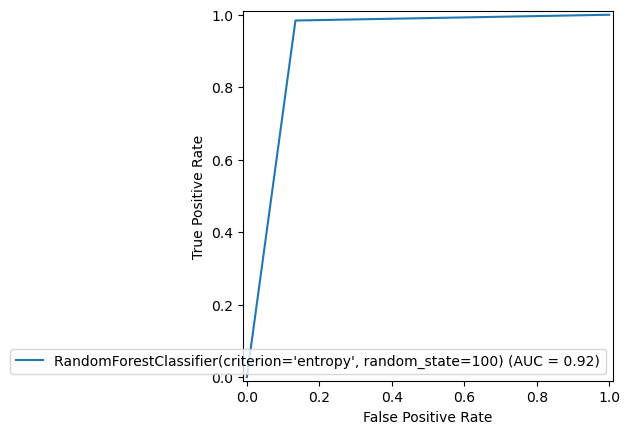

In [173]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred10)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Main_Model)
display.plot()

Saving the Model for Future use

In [174]:
import pickle

In [175]:
# saving the model
pickle.dump(Main_Model,open('Redwineproject.pkl','wb'))

In [176]:
Model=pickle.load(open('Redwineproject.pkl','rb'))            #loading the model

In [177]:
test=Model.predict(x_test)
test

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [178]:
Dataframe=pd.DataFrame({'original Value':y_test,'Predicted value':test})
Dataframe                 #creating DataFrame

,original Value,Predicted value
1532,1,1
1726,1,1
1414,1,1
2064,1,1
930,0,0
...,...,...
526,0,0
759,0,0
812,0,0
182,0,1


In [179]:
final_accuracy= accuracy_score(y_test,test)              #checking accuracy score
final_accuracy

0.9236760124610592

In [180]:
val11=cross_val_score(Main_Model,x1,y1)
print(val11.mean())
print((final_accuracy-val11.mean())*100)

0.9060747663551403
1.7601246105918955


# Accuracy of our Final Model is Good

Model=pickle.load(open('Redwineproject.pkl','rb'))  ______to load the Model

In [182]:
test6=Model.predict(np.array([8.3,0.61,0.30,2.1,0.084,50.0,0.99720,3.40,0.61,10.2]).reshape(1,-1))
test6

array([0])